Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 2.215399692
Epoch: 0002 cost= 0.577875030
Epoch: 0003 cost= 0.381320129
Epoch: 0004 cost= 0.280525818
Epoch: 0005 cost= 0.214935561
Epoch: 0006 cost= 0.167232671
Epoch: 0007 cost= 0.132011979
Epoch: 0008 cost= 0.103429132
Epoch: 0009 cost= 0.082215862
Epoch: 0010 cost= 0.064637512
Epoch: 0011 cost= 0.050724145
Epoch: 0012 cost= 0.040052389
Epoch: 0013 cost= 0.031136234
Epoch: 0014 cost= 0.023828527
Epoch: 0015 cost= 0.018586473
Epoch: 0016 cost= 0.014415627
Epoch: 0017 cost= 0.011101998
Epoch: 0018 cost= 0.008655131
Epoch: 0019 cost= 0.006818253
Epoch: 0020 cost= 0.005166704
Training phase finished


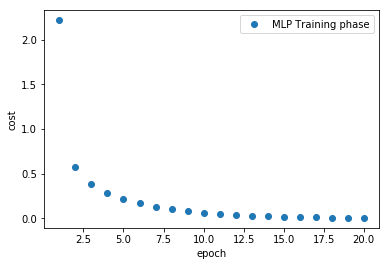

Model Accuracy: 0.9442


In [8]:
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf
import matplotlib.pyplot as plt

# Parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 256 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

# weights layer 1
h = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
# bias layer 1
bias_layer_1 = tf.Variable(tf.random_normal([n_hidden_1]))
# layer 1
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,h),bias_layer_1))

# weights layer 2
w = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
# bias layer 2
bias_layer_2 = tf.Variable(tf.random_normal([n_hidden_2]))
# layer 2
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,w),bias_layer_2))

#weights output layer
output = tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
#biar output layer
bias_output = tf.Variable(tf.random_normal([n_classes]))
#output layer
output_layer = tf.matmul(layer_2, output) + bias_output

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = output_layer, labels = y))
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) 
# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#Plot settings
avg_set = []
epoch_set=[]
    
# Launch the graph
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, { x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += sess.run(cost, { x: batch_xs, y: batch_ys }) / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
    print("Training phase finished")

    plt.plot(epoch_set,avg_set, 'o', label='MLP Training phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
        
    # Test model
    correct_prediction = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Model Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
